------------------
FRiS ans:
label 0
dist ans:
[1]


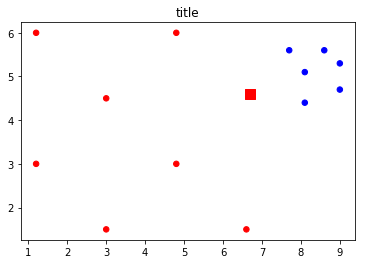

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance


X = [[1.2,3], [1.2,6], [3,1.5], [3,4.5], [4.8,3], [4.8,6], [6.6,1.5],
     [7.7, 5.6], [8.1, 4.4], [8.1, 5.1], [8.6, 5.6], [9, 4.7], [9, 5.3]]
y = [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
u = [6.7, 4.6]
u = np.array(u)
u_class = [-1]
X = np.array(X)

colors = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X[:,0], X[:,1], c=y, cmap=colors, s=30)
plt.scatter(u[0], u[1], c=u_class, cmap=ListedColormap(['#00FF00']), s=50)
plt.title("title")
# plt.show()

n = len(X)  # data length
xl = np.arange(n)  # data indexes

eps = 1e-5
alpha = 0.7
tetta = 0.1

# substraction of two sets
def sets_diff(a1, a2):
    a1 = np.atleast_1d(a1)
    a2 = np.atleast_1d(a2)
    if (not a1.size):
        return a1
    if (not a2.size):
        return a1
    return np.setdiff1d(a1,a2)

# union of two sets
def sets_union(a1, a2):
    a1 = np.atleast_1d(a1)
    a2 = np.atleast_1d(a2)
    if (not a1.size):
        return a2
    if (not a2.size):
        return a1
    return np.union1d(a1,a2)

# fris-function
def fris(a, b, x):
    return (distance.euclidean(a, x) - distance.euclidean(a, b)) / (distance.euclidean(a, x) + distance.euclidean(a, b) + eps)

# returns nearest to u object from U
def nearest_neighbor(u, U):
    nbrs = NearestNeighbors(n_neighbors=1)
    nbrs.fit(U)
    return U[nbrs.kneighbors(u, return_distance=False)]


class_val = [0, 0]
for i, val_i in enumerate(X):
    for j, val_j in enumerate(X):
        if (fris(val_i, val_j, u) < 0):
            class_val[0] = class_val[0] + 1
        else:
            class_val[1] = class_val[1] + 1

# print(class_val.index(max(class_val)))
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X, y)
u = np.reshape(u, (1,2))
# print(neigh.predict(u))

print("------------------")

classes_cnt = 1
prev = y[0]
for i, val in enumerate(y) :
    if (val != prev):
        prev = val
        classes_cnt = classes_cnt + 1

nearest_n = [list() for t in range(classes_cnt)]
for i in range(classes_cnt):
    X_class = []
    cnt = 0
    for j, val in enumerate(X):
        if (y[j] == i):
            X_class.append(val)
            cnt = cnt+1
    X_class = np.array(X_class)
    nearest_n[i] = nearest_neighbor(u, X_class)

print("FRiS ans:")
if (fris(nearest_n[0], nearest_n[1], u) < 0):
    print("label 0")
    plt.scatter(u[0][0], u[0][1], c=u_class, cmap=ListedColormap(['#FF0000']), s=100, marker = 's')
else:
    print("label 1")
    plt.scatter(u[0][0], u[0][1], c=u_class, cmap=ListedColormap(['#0000FF']), s=100, marker = 's')

print("dist ans:")
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)
u = np.reshape(u, (1,2))
print(neigh.predict(u))
plt.show()